In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv("X_Train_Data_Input.csv")
df.head()

,ID,Column0,Column1,Column2,Column3,Column4,Column5,Column6,Column7,Column8,...,Column12,Column13,Column14,Column15,Column16,Column17,Column18,Column19,Column20,Column21
0,ad1a67e4cbddc767a3456b0d94299b9e,2.0,2495,3726.0,0.678139,0.701403,-0.007468,0.434190,-0.015603,0.606265,...,0.0,0.0,0.001351,0.00339,0.0,0.0,0.0,0.0,0.0,0.0
1,7246d2f76ac0c217ec25e72ea5f014cb,0.0,2495,3454.0,0.452580,0.701403,-0.007468,1.554998,-0.015574,0.329946,...,0.0,0.0,0.001351,0.00339,0.0,0.0,0.0,0.0,0.0,0.0
2,22ba388e7dd14c13342c49e75fc29dda,2.0,2495,4543.0,-1.577453,-1.429540,-0.007469,-0.407939,-0.015607,-0.774979,...,1.0,1.0,0.001351,0.00339,0.0,0.0,0.0,0.0,0.0,0.0
3,59f9b981472d97342587fb3e6392aeb1,0.0,211,59.0,NaN,NaN,NaN,-0.407939,-0.015607,-0.774979,...,0.0,0.0,NaN,0.00339,0.0,0.0,1.0,0.0,0.0,0.0
4,f6317cf7ecf126859804eddff279aead,0.0,718,950.0,-2.028572,-1.855728,NaN,-0.407939,-0.015607,-0.774979,...,0.0,0.0,NaN,0.00339,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
df_numeric1 = df.drop(df.columns[0],axis=1)

median = np.nanmedian(df_numeric1.values, axis=0)
df_numeric1 = np.where(np.isnan(df_numeric1), median, df_numeric1)

df_filled1 = pd.DataFrame(df_numeric1, columns=df.columns[1:])

In [4]:
df_filled1.to_csv('cleaned_X_Train_Data_Input_Median.csv', index =False)

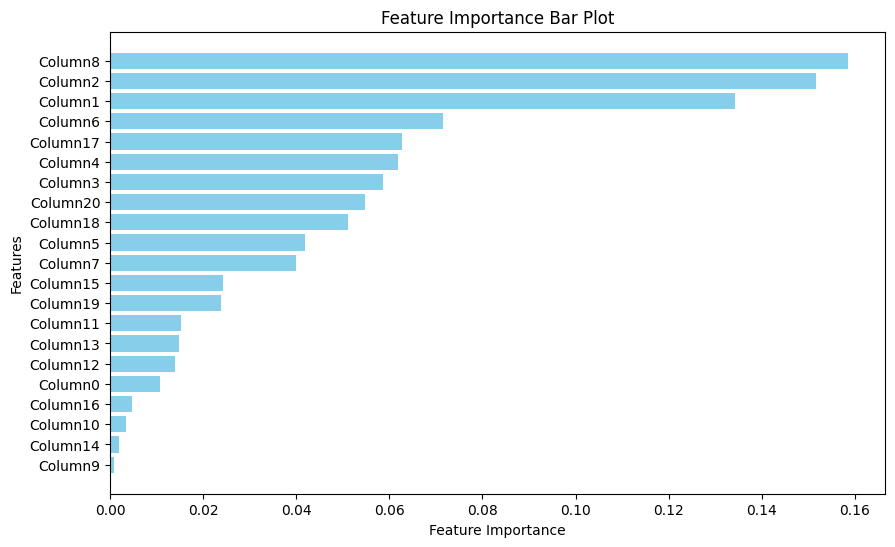

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

df1 = pd.read_csv('cleaned_X_Train_Data_Input_Median.csv')

X = df1.iloc[:, :-1]
y = df1.iloc[:, -1]

X = pd.get_dummies(X, drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model1 = RandomForestClassifier(random_state=42)
model1.fit(X_train, y_train)

importances = model1.feature_importances_
feature_names = X.columns

feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})

feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance Bar Plot')
plt.gca().invert_yaxis()
plt.show()


<ipython-input-6-d0474f4f13f5>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_scores, y=feature_scores.index,  palette="viridis")


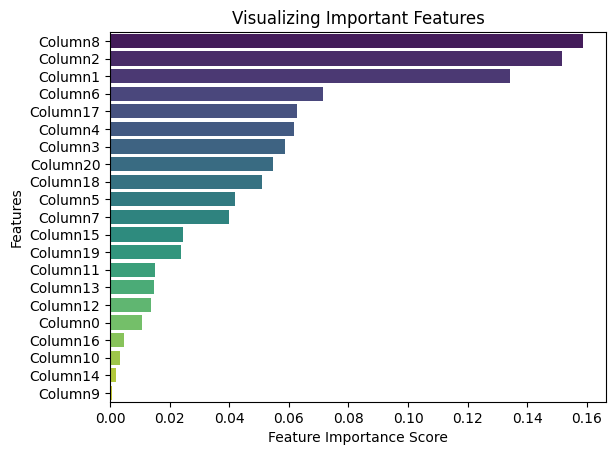

Feature scores are:


,0
Column8,0.158597
Column2,0.151597
Column1,0.134316
Column6,0.071420
Column17,0.062644
Column4,0.061798
Column3,0.058675
Column20,0.054796
Column18,0.051033
Column5,0.041825


In [6]:
feature_scores = pd.Series(model1.feature_importances_, index=X_train.columns).sort_values(ascending=False)
import seaborn as sns
import matplotlib.pyplot as plt
sns.barplot(x=feature_scores, y=feature_scores.index,  palette="viridis")
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

print('Feature scores are:')
feature_scores

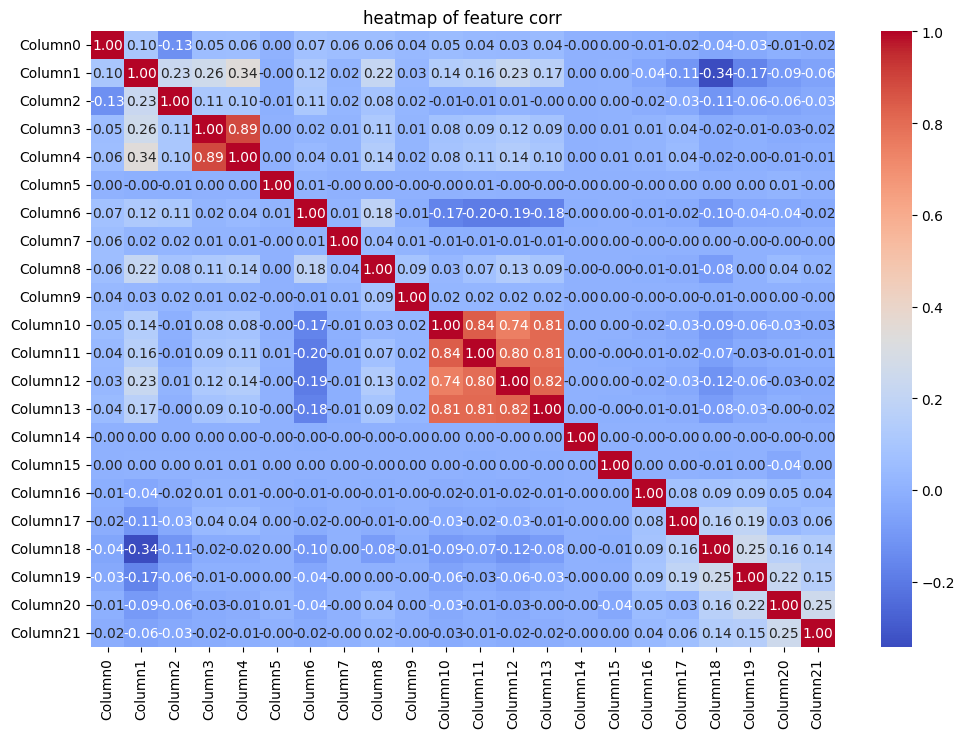

In [7]:
corr_matrix1 = pd.DataFrame(df_filled1).corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix1, annot = True, cmap='coolwarm', fmt=".2f")
plt.title("heatmap of feature corr")
plt.show()

In [8]:
import pandas as pd

df = pd.read_csv('cleaned_X_Train_Data_Input_Median.csv')

columns_to_keep = [2, 8, 1, 6, 4, 20, 10, 11]

df_selected = df.iloc[:, columns_to_keep]

df_selected.to_csv('selected_features_median_cleaned.csv', index=False)


In [9]:
df = pd.read_csv("Y_Train_Data_Target.csv")
df.head()

,ID,target
0,ad1a67e4cbddc767a3456b0d94299b9e,0.0
1,7246d2f76ac0c217ec25e72ea5f014cb,0.0
2,22ba388e7dd14c13342c49e75fc29dda,0.0
3,59f9b981472d97342587fb3e6392aeb1,1.0
4,f6317cf7ecf126859804eddff279aead,0.0


In [10]:
df_numeric_y = df.drop(df.columns[0],axis=1)

median = np.nanmedian(df_numeric_y.values, axis=0)
df_numeric_y = np.where(np.isnan(df_numeric_y), median, df_numeric_y)

df_filled_y = pd.DataFrame(df_numeric_y, columns=df.columns[1:])
df_filled1.to_csv('cleaned_Y_Train_Data_Target_Median.csv', index =False)

Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


1960/1960 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7595 - loss: 0.9967 - val_accuracy: 0.8107 - val_loss: 0.6382
Epoch 2/5
1960/1960 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8070 - loss: 0.6520 - val_accuracy: 0.8138 - val_loss: 0.6314
Epoch 3/5
1960/1960 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8089 - loss: 0.6394 - val_accuracy: 0.8173 - val_loss: 0.6287
Epoch 4/5
1960/1960 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8126 - loss: 0.6368 - val_accuracy: 0.8168 - val_loss: 0.6279
Epoch 5/5
1960/1960 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8112 - loss: 0.6397 - val_accuracy: 0.8166 - val_loss: 0.6246
613/613 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8131 - loss: 0.6312
613/613 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/m

Test Loss: 0.627508819103241
Log Loss: 0.6275087242558045
Test Accuracy: 81.27902746200562
Confusion Matrix:
 [[15567     0   149     0     0     0     0     0     0     0     0     0
      0     0     0]
 [ 1227     0   218     0     0     0     0     0     0     0     0     0
      0     0     0]
 [ 1450     0   357     0     0     0     0     0     0     0     0     0
      0     0     0]
 [   48     0     3     0     0     0     0     0     0     0     0     0
      0     0     0]
 [  139     0     2     0     1     0     0     0     0     0     0     0
      0     0     0]
 [  104     0    51     0     0     0     0     0     0     0     0     0
      0     0     0]
 [  142     0     8     0     0     0     0     0     0     0     0     0
      0     0     0]
 [   85     0     5     0     0     0     0     0     0     0     0     0
      0     0     0]
 [    5     0     1     0     0     0     0     0     0     0     0     0
      0     0     0]
 [   13     0     2     0     0    

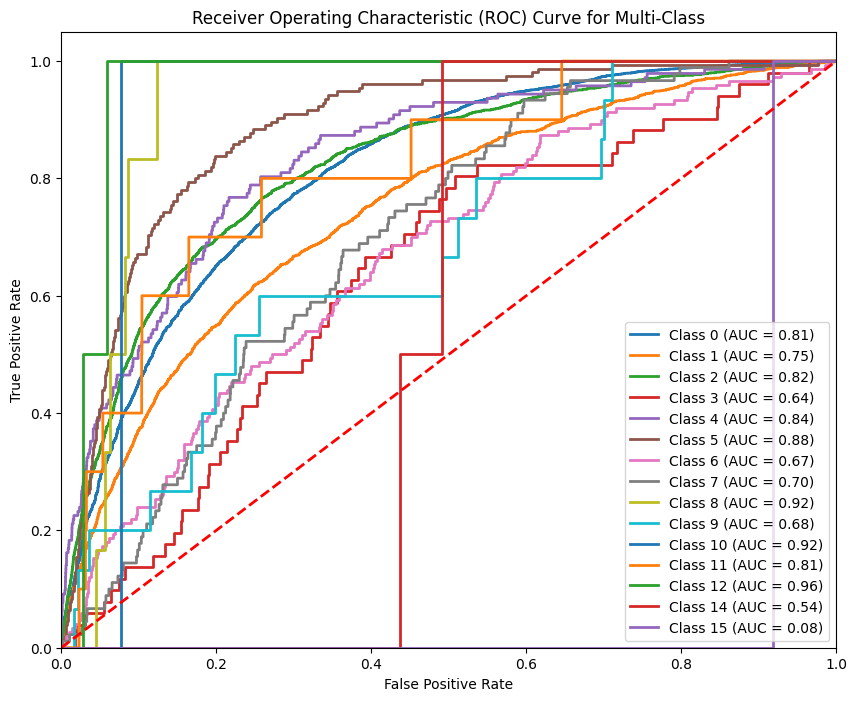

In [14]:
#using leaky relu with optimiser adam

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras import layers, models
from keras.utils import to_categorical
from sklearn.metrics import (confusion_matrix, classification_report, roc_auc_score,
                             log_loss, f1_score, precision_score, recall_score)
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import roc_curve

# Load the data
X = pd.read_csv('selected_features_median_cleaned.csv')
y = pd.read_csv('cleaned_Y_Train_Data_Target_Median.csv')

# Preprocess the target variable
y = y.iloc[:, 0]

# One-hot encode the target variable for multi-class classification
y = to_categorical(y)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build the model
input_dim = X_train.shape[1]
num_classes = y_train.shape[1]  # Get the number of classes
model = models.Sequential()
model.add(layers.Dense(units=64, input_shape=(input_dim,), activation='linear'))
model.add(layers.LeakyReLU(alpha=0.01))
model.add(layers.Dense(units=num_classes, activation='softmax'))  # Use softmax for multi-class

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=5, batch_size=32, validation_split=0.2)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)

# Predictions
y_pred_prob = model.predict(X_test)
y_pred = np.argmax(y_pred_prob, axis=1)  # Get the predicted class labels
y_true = np.argmax(y_test, axis=1)  # Get the true class labels

# Calculate additional metrics
log_loss_value = log_loss(y_test, y_pred_prob)
conf_matrix = confusion_matrix(y_true, y_pred)
class_report = classification_report(y_true, y_pred, output_dict=True)

# Calculate ROC AUC score for each class and ensure at least two classes are present
roc_auc = {}
for i in range(num_classes):
    if np.sum(y_test[:, i]) > 0:  # Check if the class is present in the true labels
        roc_auc[i] = roc_auc_score(y_test[:, i], y_pred_prob[:, i])
    else:
        roc_auc[i] = None  # Class is not present

# Print metrics
print("Test Loss:", loss)
print("Log Loss:", log_loss_value)
print("Test Accuracy:", accuracy * 100)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_report(y_true, y_pred))
print("AUC for each class:", roc_auc)

# Plotting ROC AUC for each class
plt.figure(figsize=(10, 8))
for i in range(num_classes):
    if roc_auc[i] is not None:  # Only plot if the class is present in y_true
        fpr, tpr, _ = roc_curve(y_test[:, i], y_pred_prob[:, i])
        plt.plot(fpr, tpr, lw=2, label='Class {} (AUC = {:.2f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Multi-Class')
plt.legend(loc='lower right')
plt.show()



In [20]:
df = pd.read_csv("X_Test_Data_Input.csv")
import pandas as pd
import numpy as np

# Assuming the CSV is already loaded as 'df'
# Keep the first column intact
first_column = df.iloc[:, 0]  # Extract the first column (ID)
df_numeric = df.iloc[:, 1:]   # Select the remaining columns for median calculation

# Calculate the median and replace NaN values with the median for numeric columns
median = np.nanmedian(df_numeric.values, axis=0)
df_numeric = np.where(np.isnan(df_numeric), median, df_numeric)

# Create a new DataFrame with filled values and the same column names (excluding the first column)
df_filled = pd.DataFrame(df_numeric, columns=df.columns[1:])

# Re-add the first column to the final DataFrame
df_filled.insert(0, df.columns[0], first_column)

# Save the final DataFrame to a CSV
df_filled.to_csv('cleaned_X_Test_Data_Input_Median.csv', index=False)

print("CSV saved successfully with the first column intact.")
file_path = 'cleaned_X_Test_Data_Input_Median.csv'  # Update with your file path
df = pd.read_csv(file_path)

# Strip any leading/trailing spaces from column names
df.columns = df.columns.str.strip()

columns_to_keep = ['ID', 'Column2', 'Column8', 'Column1', 'Column6', 'Column4', 'Column20', 'Column10', 'Column11']

# Drop the rest of the columns
df_cleaned = df.drop(columns=[col for col in df.columns if col not in columns_to_keep])

# Save the resulting dataframe to a new CSV
output_path = 'cleaned_X_Test_Data.csv'
df_cleaned.to_csv(output_path, index=False)

print(f"Cleaned CSV saved at: {output_path}")

CSV saved successfully with the first column intact.
Cleaned CSV saved at: cleaned_X_Test_Data.csv


In [29]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report

# Load the test data
X_test_df = pd.read_csv('cleaned_X_Test_Data.csv')
Y_test_df = pd.read_csv('Y_Test_Data_Target.csv')

# Check the column names
print("X_test_df columns:", X_test_df.columns)
print("Y_test_df columns:", Y_test_df.columns)

# Ensure the correct column name for merging
merge_column = 'ID'  # Change to the correct column name if necessary

# Merge test feature data and test target data on 'IDs'
try:
    test_df = pd.merge(X_test_df, Y_test_df, on=merge_column)
except KeyError as e:
    print(f"KeyError: {e}. Please check the column names in both DataFrames.")
    raise  # Reraise the error after printing the message for further investigation

# Separate the features (X_test) and the actual targets (y_test)
X_test = test_df.drop(['ID', 'target'], axis=1)  # Ensure 'target' is correctly named
y_test = test_df['target']

# Handle NaN values by replacing them with the median for each column
X_test.fillna(X_test.median(), inplace=True)

# Standardize the features (use the same scaler fitted on the training set)
scaler = StandardScaler()
X_test_scaled = scaler.fit_transform(X_test)

# Use the trained ridge regression model to predict the target on test data
# Ensure the model is defined and trained before this line
y_pred_proba = model.predict(X_test_scaled)  # Get predicted probabilities

# Convert probabilities to binary predictions (for binary classification)
y_pred = (y_pred_proba[:, 1] >= 0.5).astype(int)  # Using a threshold

# OR for multi-class classification:
# y_pred = np.argmax(y_pred_proba, axis=1)  # If multi-class

# Check shapes
print("Shape of y_test:", y_test.shape)
print("Shape of y_pred:", y_pred.shape)

# Ensure consistency
if len(y_test) != len(y_pred):
    print("Mismatch in lengths of y_test and y_pred!")
else:
    # Compare the predictions with the actual targets
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy * 100:.2f}%")

    # Detailed classification report
    print(classification_report(y_test, y_pred))

    # Optional: Save the predictions to a CSV file if needed
    output_df = pd.DataFrame({
        'IDs': test_df['ID'],
        'Actual Target': y_test,
        'Predicted Target': y_pred
    })

    output_df.to_csv('Test_Predictions.csv', index=False)
    print("Predictions saved to Test_Predictions.csv")



X_test_df columns: Index(['ID', 'Column1', 'Column2', 'Column4', 'Column6', 'Column8', 'Column10',
       'Column11', 'Column20'],
      dtype='object')
Y_test_df columns: Index(['ID', 'target'], dtype='object')
3982/3982 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step
Shape of y_test: (127413,)
Shape of y_pred: (127413,)
Accuracy: 90.52%
              precision    recall  f1-score   support

           0       0.91      1.00      0.95    115336
           1       0.00      0.00      0.00     12077

    accuracy                           0.91    127413
   macro avg       0.45      0.50      0.48    127413
weighted avg       0.82      0.91      0.86    127413



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Predictions saved to Test_Predictions.csv
